In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# use iris and get only petal width and sepal length
iris = load_iris()
sepal_length = iris.data[:, 0]
petal_width = iris.data[:, 3]
target = iris.target

species_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
species_name = [species_dict[i] for i in target]

In [3]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.iterations = 10_000
        self.learning_rate = 0.01
        self.intercept = 0
        self.coefficients = None  # Now a vector of coefficients
        self.X = None
        self.y = None
        self.length = 0
        self.loss_history = list()

    def _intercept(self):
        return self.intercept

    def _coefficients(self):
        return self.coefficients

    def _loss_history(self):
        return self.loss_history

    def mean_squared_error(self, predictions):
        return np.sum(np.square(predictions - self.y)) / self.length

    def predict(self, X):
        return self.intercept + np.dot(X, self.coefficients)

    def update_params(self, predictions):
        error = predictions - self.y
        self.intercept -= self.learning_rate * np.sum(error) / self.length
        self.coefficients -= self.learning_rate * (np.dot(self.X.T, error) / self.length)

    def fit(self, X, y):
        self.X = np.array(X)
        if len(self.X.shape) == 1:
            self.X = self.X.reshape(-1, 1) # to support 1D data, otherwise self.coefficients = np.zeros(self.X.shape[1]) will fail
        self.y = np.array(y)
        self.length = len(self.y)
        self.coefficients = np.zeros(self.X.shape[1])

        for _ in range(self.iterations):
            predictions = self.predict(self.X)
            self.update_params(predictions)
            self.loss_history.append(self.mean_squared_error(predictions))

lin_reg = LinearRegression()
lin_reg.fit(sepal_length, petal_width)
print(f"intercept: {lin_reg._intercept()}, coefficients: {lin_reg._coefficients()}")

intercept: -2.7174583375849535, coefficients: [0.67187247]


In [4]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.iterations = 10_000
        self.learning_rate = 0.01
        self.intercept = 0
        self.coefficient = 0
        self.X = np.array([])
        self.y = np.array([])
        self.length = 0
        self.loss_history = list()
        self.intercept_history = list()
        self.coefficient_history = list()

    def _intercept(self):
        return self.intercept

    def _coefficient(self):
        return self.coefficient

    def _loss_history(self):
        return self.loss_history
    
    def _intercept_history(self):
        return self.intercept_history
    
    def _coefficient_history(self):
        return self.coefficient_history

    def mean_squared_error(self, predictions):
        return np.sum(np.square(predictions - self.y)) / self.length

    def predict(self, X):
        return self.intercept + self.coefficient * X

    def update_params(self, predictions):
        error = predictions - self.y
        self.intercept -= self.learning_rate * np.sum(error) / self.length
        self.intercept_history.append(self.intercept)
        self.coefficient -= self.learning_rate * np.sum(error * self.X) / self.length
        self.coefficient_history.append(self.coefficient)

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        self.length = len(self.y)

        for _ in range(self.iterations):
            predictions = self.predict(self.X)
            self.update_params(predictions)
            self.loss_history.append(self.mean_squared_error(predictions))

lin_reg = LinearRegression()
lin_reg.fit(sepal_length, petal_width)

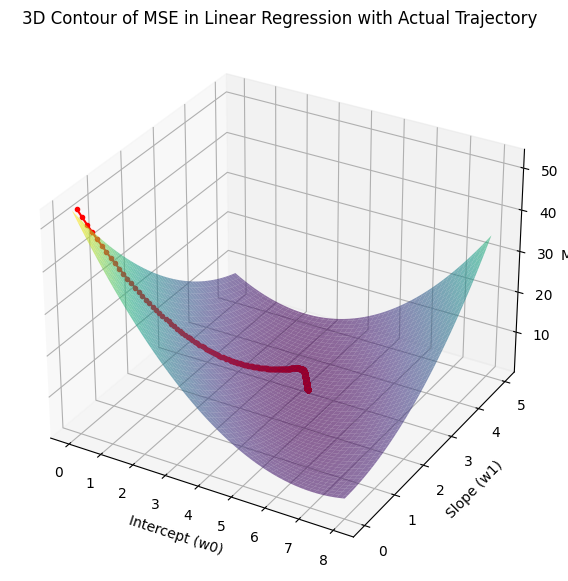

In [7]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Define a range of values for parameters 'slope' (w1) and 'intercept' (w0)
w0 = np.linspace(0, 8, 100)
w1 = np.linspace(0, 5, 100)
W0, W1 = np.meshgrid(w0, w1)

# Calculate MSE for each combination of w0 and w1
MSE = np.zeros(W0.shape)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        y_pred = W0[i, j] + W1[i, j] * X
        MSE[i, j] = np.mean((y - y_pred) ** 2)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, W1, MSE, cmap='viridis', alpha=0.6)  # Slightly transparent for better visibility
ax.plot(lin_reg.intercept_history, lin_reg.coefficient_history, lin_reg.loss_history, color='r', marker='o', markersize=3)
ax.set_xlabel('Intercept (w0)')
ax.set_ylabel('Slope (w1)')
ax.set_zlabel('MSE')
ax.set_title('3D Contour of MSE in Linear Regression with Actual Trajectory')
plt.show()